In [1]:
import numpy as np
import pandas as pd
import pickle
from plotnine import *
import warnings
warnings.filterwarnings('ignore')

In [2]:
#gr - ratio of groups
def get_group_ratio(df):
    df['gr'] = (df.f_tp + df.f_fp + df.f_tn + df.f_fn) / (df.m_tp + df.m_fp + df.m_tn + df.m_fn + df.f_tp + df.f_fp + df.f_tn + df.f_fn)
    return df

#ir - for real classes
def get_imbalance_ratio(df):
    df['ir'] =  (df.f_tp + df.f_fn + df.m_tp + df.m_fn) / (df.f_tn + df.f_fn + df.m_tn + df.m_fn + df.f_fp +df.f_tp + df.m_fp + df.m_tp)
    return df

def get_matrix_measures(df):
    df['m_tpr'] = df.m_tp/(df.m_tp + df.m_fn)
    df['f_tpr'] = df.f_tp/(df.f_tp + df.f_fn)
    df['m_ppv'] = df.m_tp/(df.m_tp + df.m_fp)
    df['f_ppv'] = df.f_tp/(df.f_tp + df.f_fp)
    df['m_npv'] = df.m_tn/(df.m_tn + df.m_fn)
    df['f_npv'] = df.f_tn/(df.f_tn + df.f_fn)
    df['m_fpr'] = df.m_fp/(df.m_fp + df.m_tn)
    df['f_fpr'] = df.f_fp/(df.f_fp + df.f_tn)
    df = df.replace(np.NaN, 0)
    df = df.replace([np.inf, -np.inf], 0)
    return df
    
    
#equal opportunity
#ratio of true positive rates
def get_equal_opp_ratio(df):
    df['equal_opp_ratio'] = df.f_tpr / df.m_tpr
    return df


#equal opportunity
#difference of true positive rates
def get_equal_opp_diff(df):
    df["equal_opp_diff"] = df.f_tpr - df.m_tpr
    print(df)
    return df


#each group has the same probability of being classified with positive outcome
def get_statistical_parity(df):
    df["stat_parity"] = ((df.f_tp + df.f_fp)/(df.f_tp + df.f_fp + df.f_tn + df.f_fn)) - ((df.m_tp + df.m_fp)/(df.m_tp + df.m_fp + df.m_tn + df.m_fn))
    return df


#similiar to statistical parity, but using ratio
def get_disparate_impact(df):
    df["disp_impact"] = ((df.f_tp + df.f_fp)/(df.f_tp + df.f_fp + df.f_tn + df.f_fn)) / ((df.m_tp + df.m_fp)/(df.m_tp + df.m_fp + df.m_tn + df.m_fn))
    return df


#accuracy equality ratio
def get_acc_equality_ratio(df):
    df["acc_equality_ratio"] = ((df.f_tp + df.f_tn)/(df.f_tp + df.f_fp + df.f_tn + df.f_fn)) / ((df.m_tp + df.m_tn)/(df.m_tp + df.m_fp + df.m_tn + df.m_fn))
    return df


#accuracy equality difference
def get_acc_equality_diff(df):
    df["acc_equality_diff"] = ((df.f_tp + df.f_tn)/(df.f_tp + df.f_fp + df.f_tn + df.f_fn)) - ((df.m_tp + df.m_tn)/(df.m_tp + df.m_fp + df.m_tn + df.m_fn))
    return df


#predictive equality ratio
def get_pred_equality_ratio(df):
    df["pred_equality_ratio"] = df.f_fpr / df.m_fpr
    return df


#predictive equality difference - false positive rate
def get_pred_equality_diff(df):
    df["pred_equality_diff"] = df.f_fpr - df.m_fpr
    return df


#positive predictive parity ratio
def get_pred_parity_ratio(df):
    df["pred_parity_ratio"] = df.f_ppv / df.m_ppv
    return df


#positive predictive parity difference
def get_pos_pred_parity_diff(df):
    df["pos_pred_parity_diff"] = df.f_ppv - df.m_ppv
    return df


#negative predictive parity difference
def get_neg_pred_parity_diff(df):
    df["neg_pred_parity_diff"] = df.f_npv / df.m_npv
    return df


#negative predictive parity difference
def get_neg_pred_parity_diff(df):
    df["neg_pred_parity_diff"] = df.f_npv - df.m_npv
    return df

In [3]:
fm_full_names = {
    'equal_opp_ratio': 'Equal Opportunity Ratio',
    'equal_opp_diff': 'Equal Opportunity Difference',
    'stat_parity': 'Statistical Parity',
    'disp_impact': 'Disparate Impact',
    'acc_equality_ratio': 'Accuracy Equality Ratio',
    'acc_equality_diff': 'Accuracy Equality Difference',
    'pred_equality_ratio': 'Predictive Equality Ratio',
    'pred_equality_diff': 'Predictive Equality Difference',
    'pred_parity_ratio': 'Predictive Parity Ratio',
    'pos_pred_parity_diff': 'Positive Predictive Parity Difference',
    'neg_pred_parity_diff': 'Negative Predictive Parity Difference'
}

In [4]:
def create_dataframe(X):
    
    df = pd.DataFrame(X, columns=['m_tp', 'm_fp', 'm_tn', 'm_fn', 'f_tp', 'f_fp', 'f_tn', 'f_fn'])
    
    df = get_group_ratio(df)
    df = get_imbalance_ratio(df)
    


    df.replace([np.inf, -np.inf], 0, inplace=True)
    df = get_matrix_measures(df)
    
    # calculate fairness measures - these with differences in definition
    df = get_equal_opp_diff(df)
    df = get_pred_equality_diff(df)
    
    df = get_acc_equality_diff(df)
    df = get_statistical_parity(df)

    df = get_pos_pred_parity_diff(df)
    df = get_neg_pred_parity_diff(df)
    
    print(df)
    return df

In [5]:
with open("Set(08,40).bin", "rb") as f:
    X = pickle.load(f)

In [6]:
df = create_dataframe(X)

          m_tp  m_fp  m_tn  m_fn  f_tp  f_fp  f_tn  f_fn     gr     ir  m_tpr  \
0           40     0     0     0     0     0     0     0  0.000  1.000  1.000   
1           39     1     0     0     0     0     0     0  0.000  0.975  1.000   
2           39     0     1     0     0     0     0     0  0.000  0.975  1.000   
3           39     0     0     1     0     0     0     0  0.000  1.000  0.975   
4           39     0     0     0     1     0     0     0  0.025  1.000  1.000   
...        ...   ...   ...   ...   ...   ...   ...   ...    ...    ...    ...   
62891494     0     0     0     0     0     0     4    36  1.000  0.900  0.000   
62891495     0     0     0     0     0     0     3    37  1.000  0.925  0.000   
62891496     0     0     0     0     0     0     2    38  1.000  0.950  0.000   
62891497     0     0     0     0     0     0     1    39  1.000  0.975  0.000   
62891498     0     0     0     0     0     0     0    40  1.000  1.000  0.000   

          f_tpr  m_ppv  f_p

In [7]:
df.ir.unique()

array([1.   , 0.975, 0.95 , 0.925, 0.9  , 0.875, 0.85 , 0.825, 0.8  ,
       0.775, 0.75 , 0.725, 0.7  , 0.675, 0.65 , 0.625, 0.6  , 0.575,
       0.55 , 0.525, 0.5  , 0.475, 0.45 , 0.425, 0.4  , 0.375, 0.35 ,
       0.325, 0.3  , 0.275, 0.25 , 0.225, 0.2  , 0.175, 0.15 , 0.125,
       0.1  , 0.075, 0.05 , 0.025, 0.   ])

In [8]:
ir_selected = [0.05, 0.25, 0.5, 0.75, 0.95]
gr_selected = [0.05, 0.25, 0.5, 0.75, 0.95]
df_selected = df.loc[df.ir.isin(ir_selected) & df.gr.isin(gr_selected)]

In [9]:
df_selected = df_selected.replace(np.NaN, 0)
df_selected = df_selected.replace([np.inf, -np.inf], 0)
df_selected

,m_tp,m_fp,m_tn,m_fn,f_tp,f_fp,f_tn,f_fn,gr,ir,...,m_npv,f_npv,m_fpr,f_fpr,equal_opp_diff,pred_equality_diff,acc_equality_diff,stat_parity,pos_pred_parity_diff,neg_pred_parity_diff
30,38,0,0,0,0,2,0,0,0.05,0.95,...,0.0,0.000000,0.0,1.0,-1.0,1.0,-1.000000,0.0,-1.000000,0.000000
31,38,0,0,0,0,1,1,0,0.05,0.95,...,0.0,1.000000,0.0,0.5,-1.0,0.5,-0.500000,-0.5,-1.000000,1.000000
33,38,0,0,0,0,0,2,0,0.05,0.95,...,0.0,1.000000,0.0,0.0,-1.0,0.0,0.000000,-1.0,-1.000000,1.000000
55,37,1,0,0,1,1,0,0,0.05,0.95,...,0.0,0.000000,1.0,1.0,0.0,0.0,-0.473684,0.0,-0.473684,0.000000
56,37,1,0,0,1,0,1,0,0.05,0.95,...,0.0,1.000000,1.0,0.0,0.0,-1.0,0.026316,-0.5,0.026316,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62867639,0,0,0,2,0,0,38,0,0.95,0.05,...,0.0,1.000000,0.0,0.0,0.0,0.0,1.000000,0.0,0.000000,1.000000
62867647,0,0,0,2,0,0,30,8,0.95,0.25,...,0.0,0.789474,0.0,0.0,0.0,0.0,0.789474,0.0,0.000000,0.789474
62867657,0,0,0,2,0,0,20,18,0.95,0.50,...,0.0,0.526316,0.0,0.0,0.0,0.0,0.526316,0.0,0.000000,0.526316
62867667,0,0,0,2,0,0,10,28,0.95,0.75,...,0.0,0.263158,0.0,0.0,0.0,0.0,0.263158,0.0,0.000000,0.263158


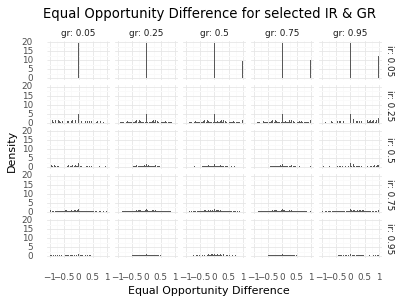

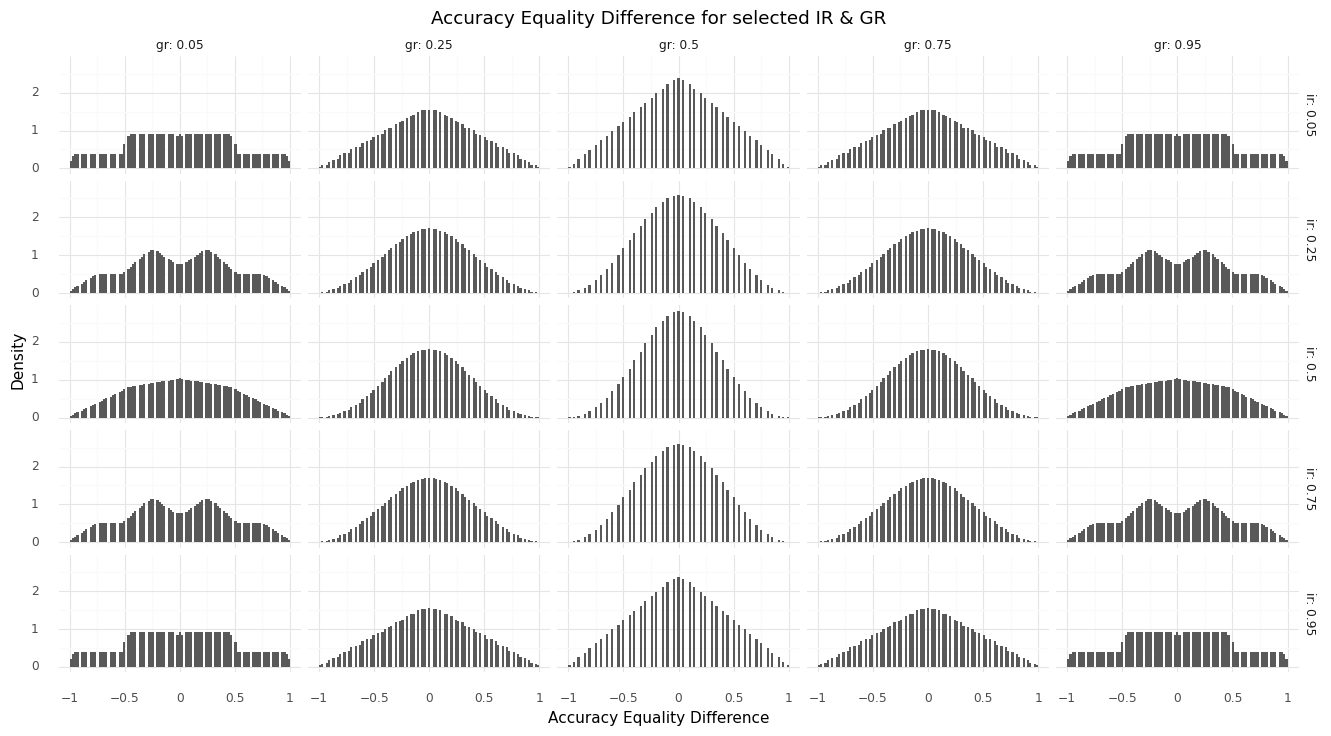

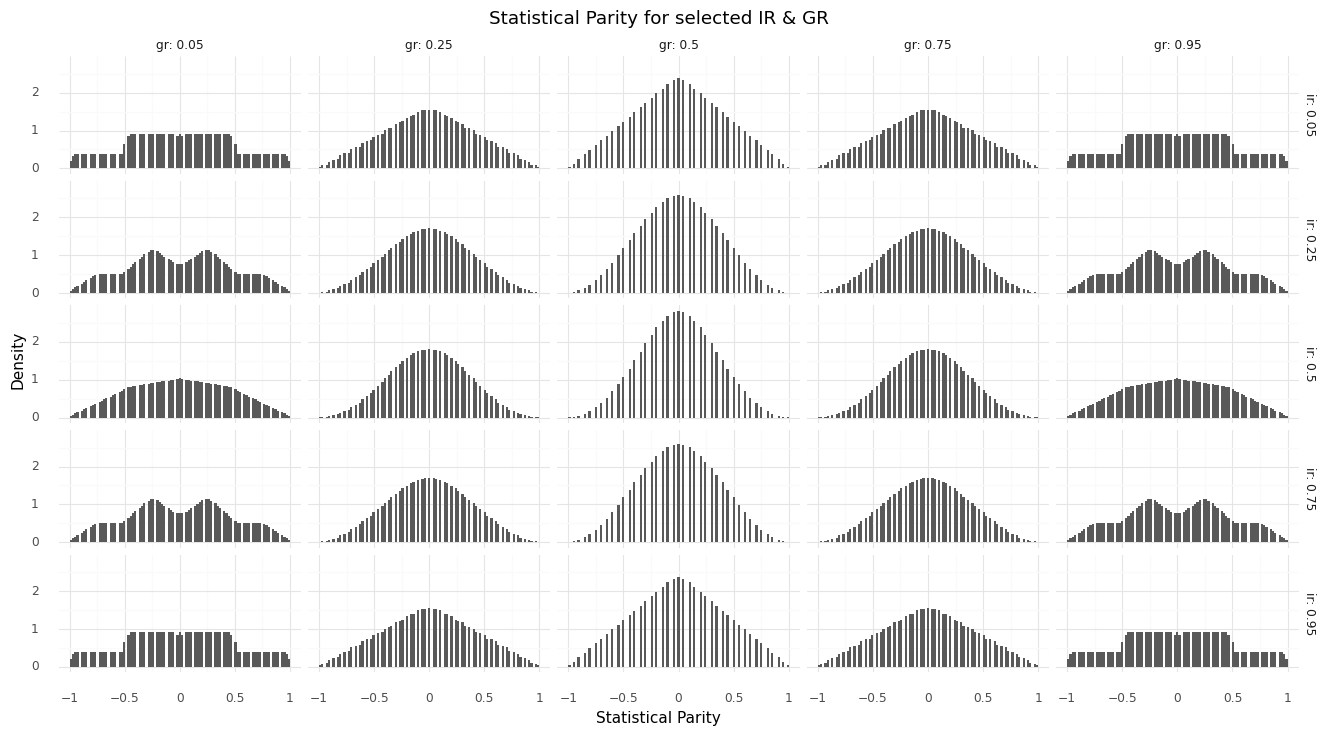

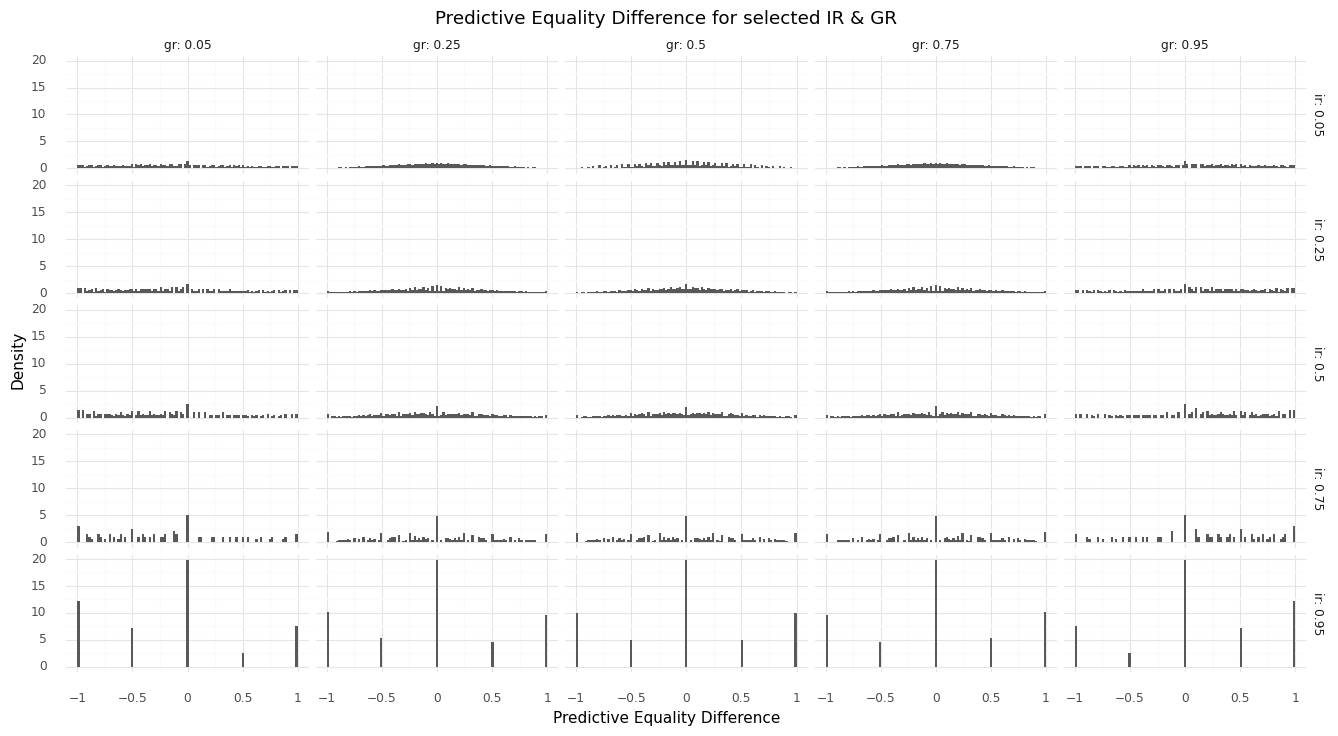

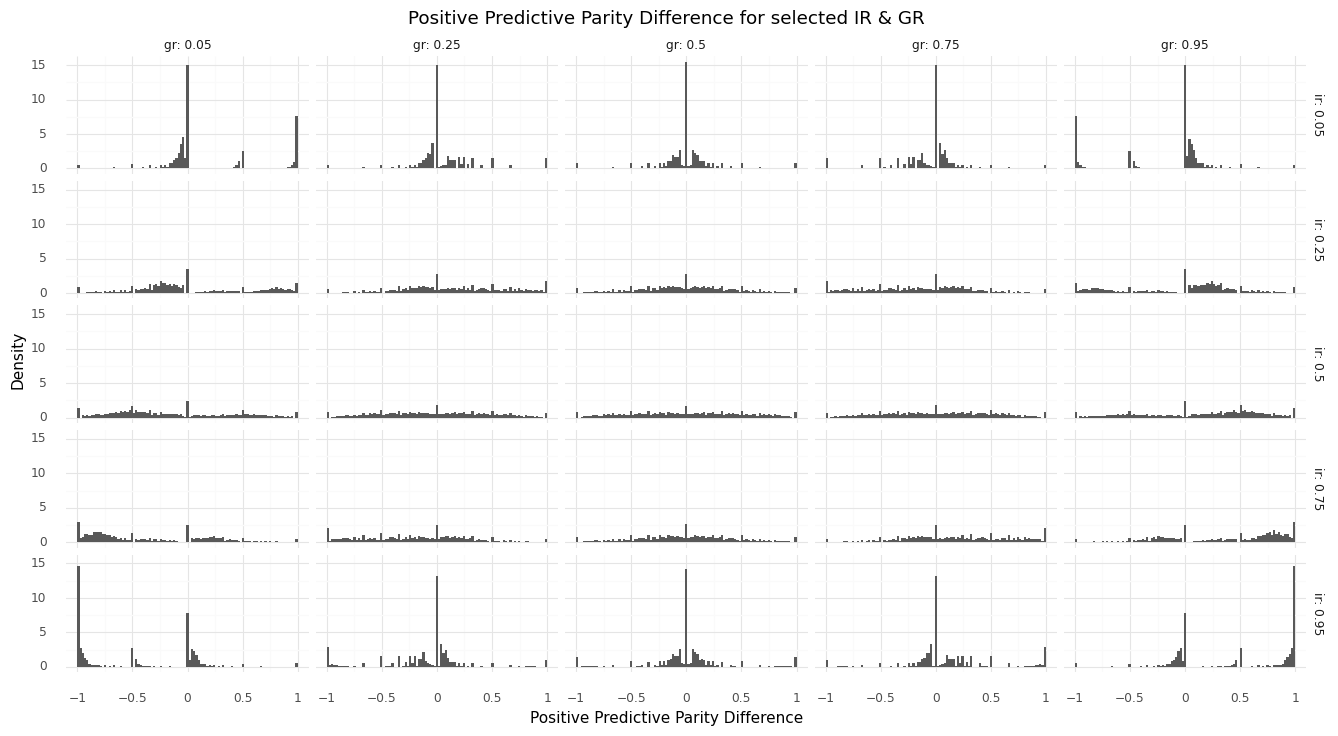

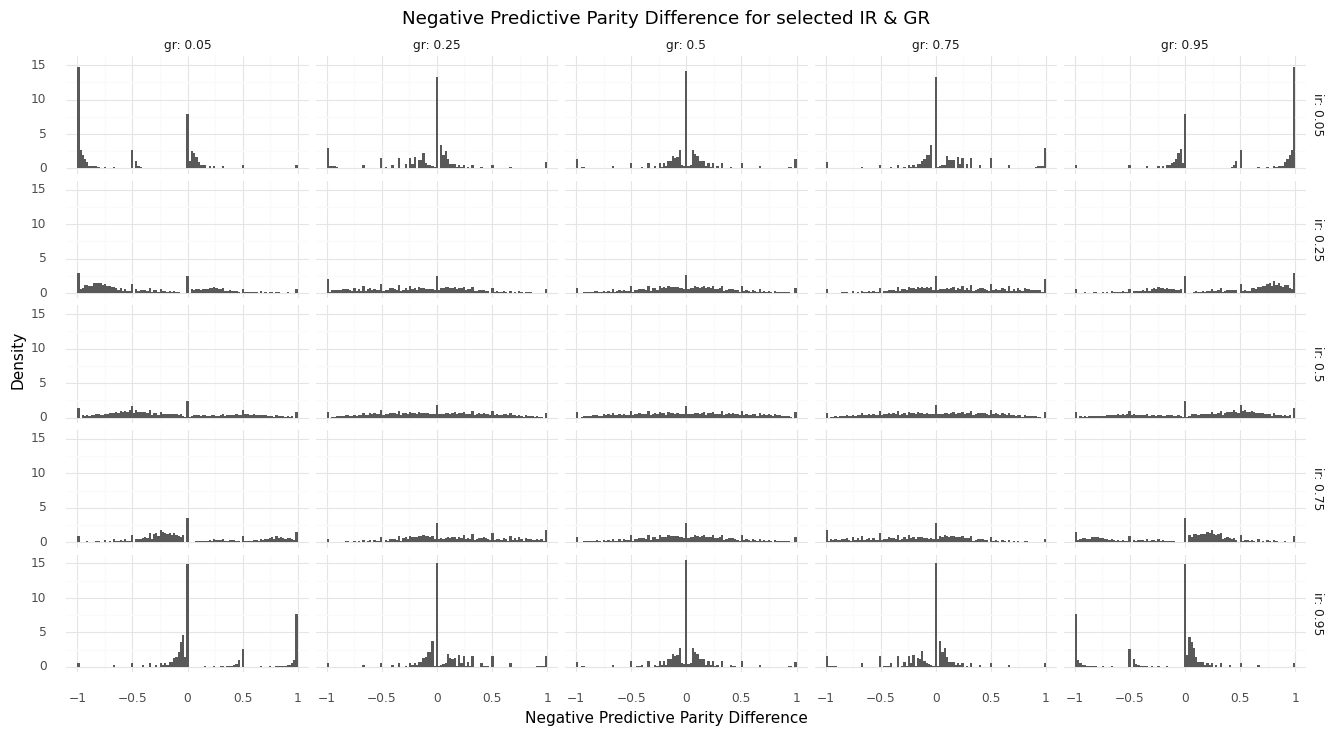

In [10]:
for metric in ["equal_opp_diff", "acc_equality_diff", "stat_parity", "pred_equality_diff", "pos_pred_parity_diff", "neg_pred_parity_diff"]:
    title = fm_full_names.get(metric)
    fig = (
        ggplot(df_selected, aes(x=metric, y=after_stat('density')))
        + geom_histogram(bins=100)
        + facet_grid('ir~gr', labeller = 'label_both')
        + theme_minimal()
        + theme(figure_size=(16, 8))
        + xlab(title)
        + ylab("Density")
        + ggtitle(f"{title} for selected IR & GR")
    )
    print(fig)
    fig.save(filename=f"plots/histogram_ir_gr_{metric}.png")

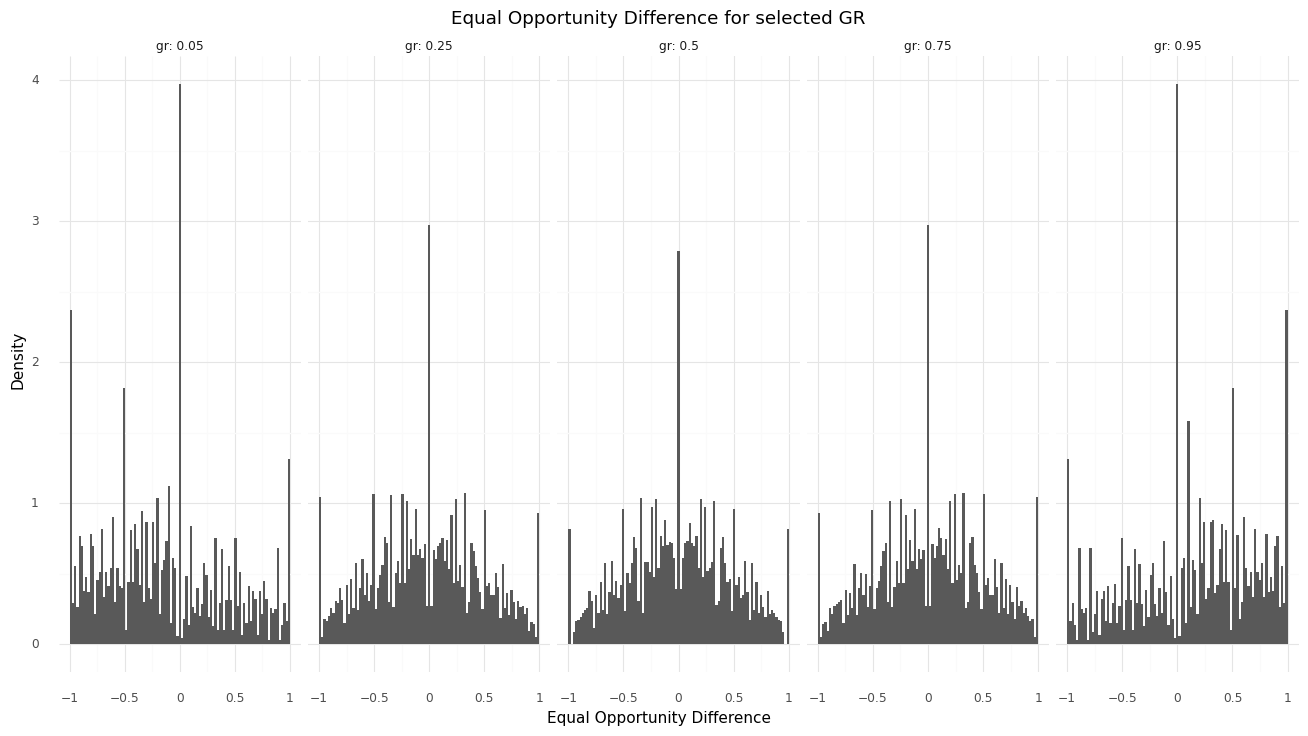

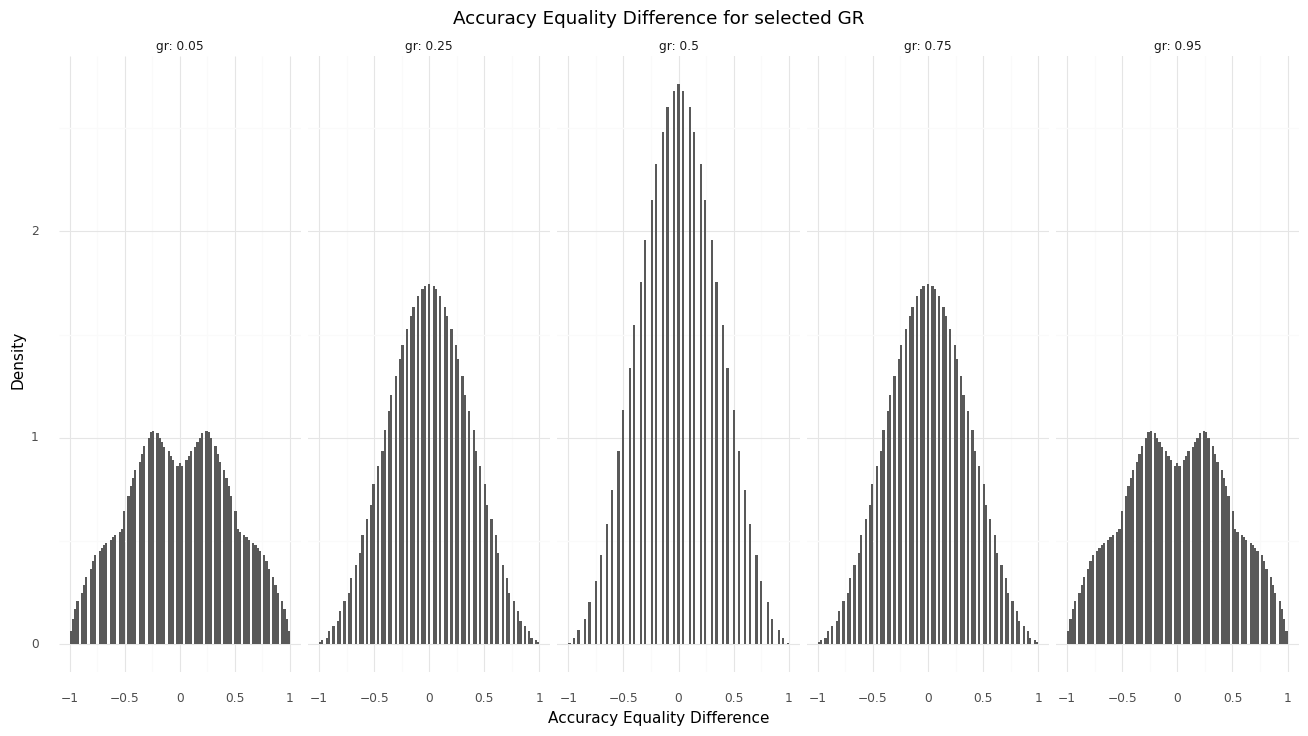

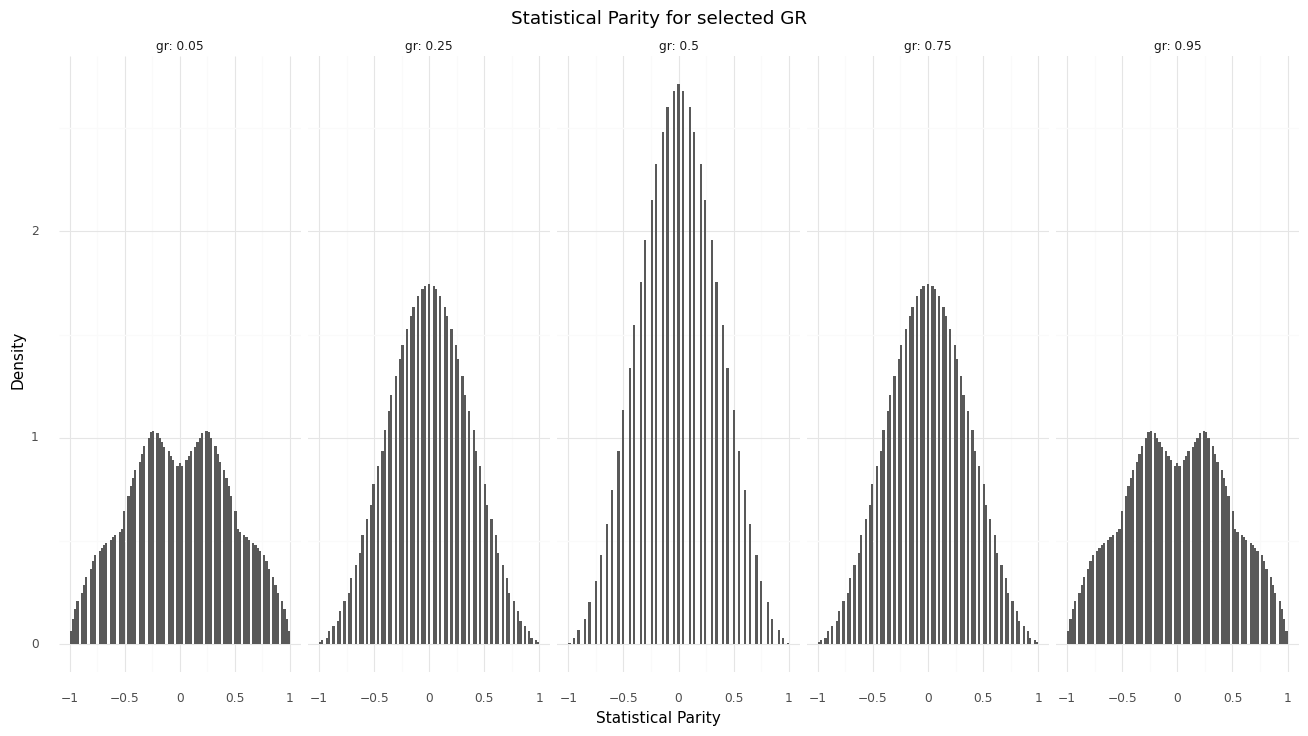

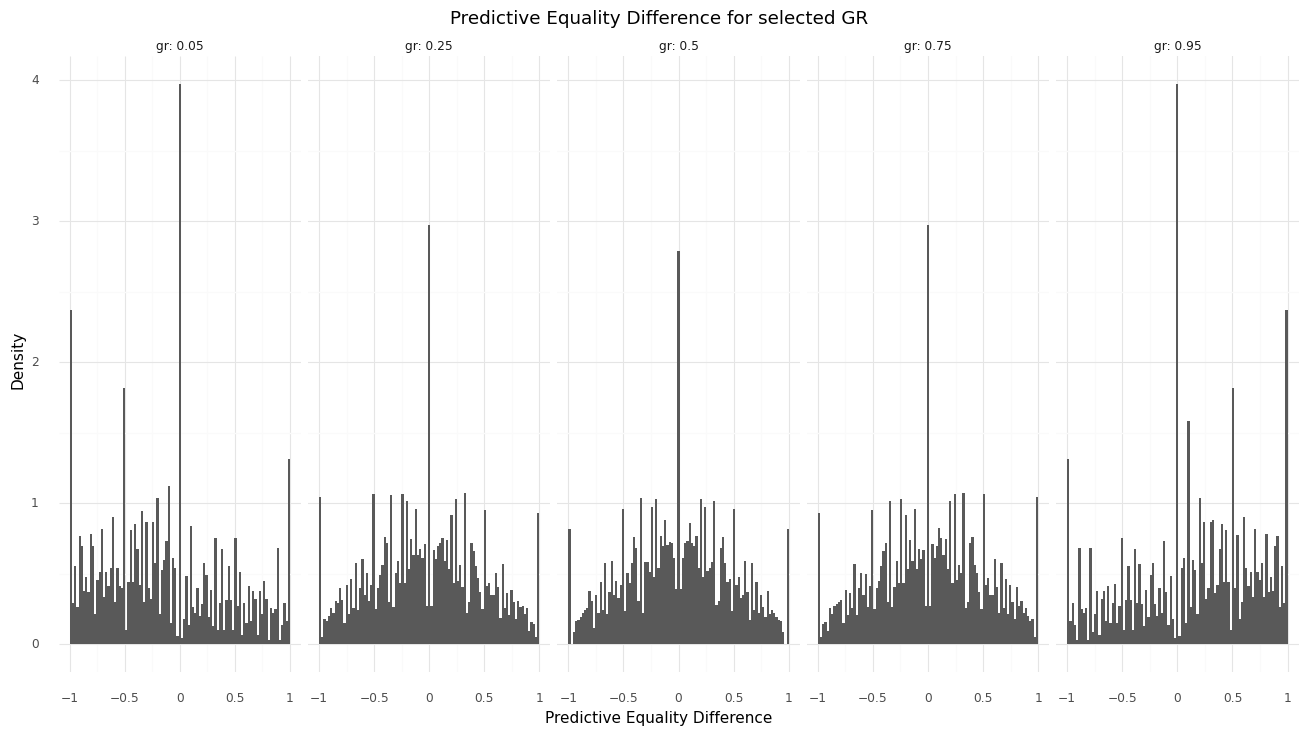

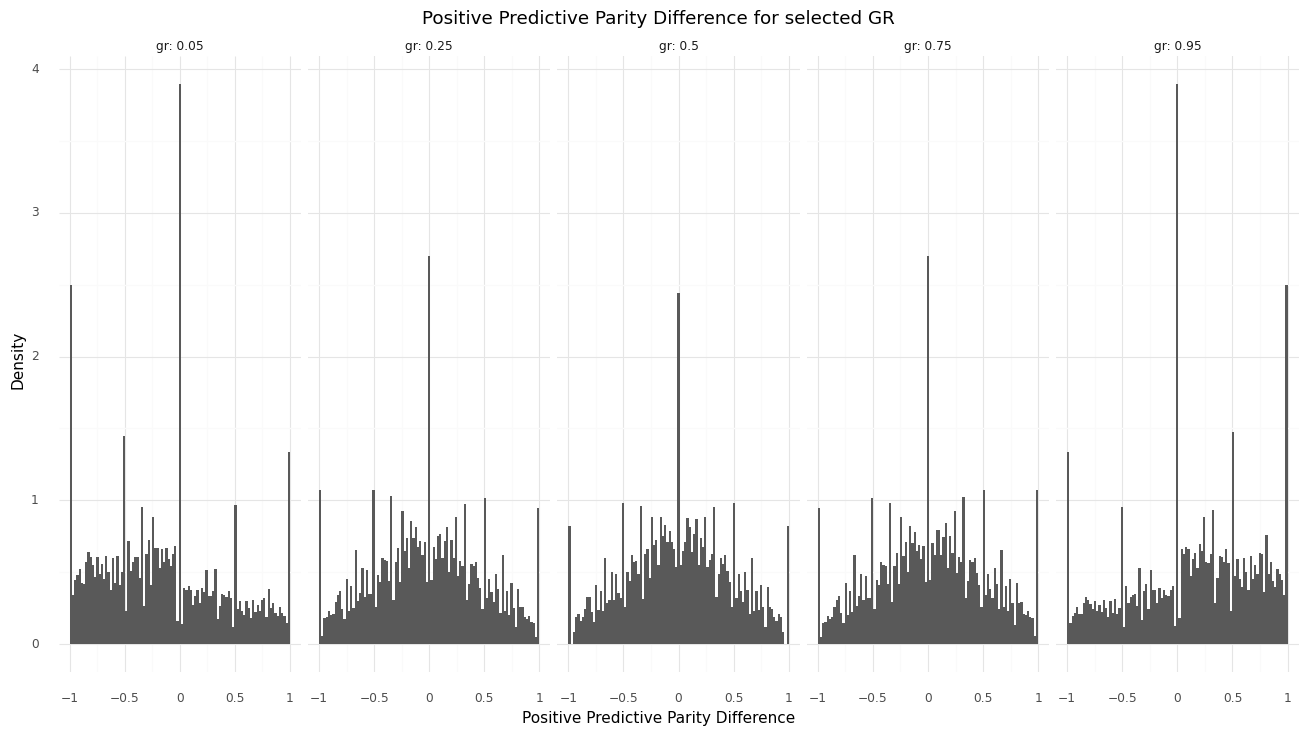

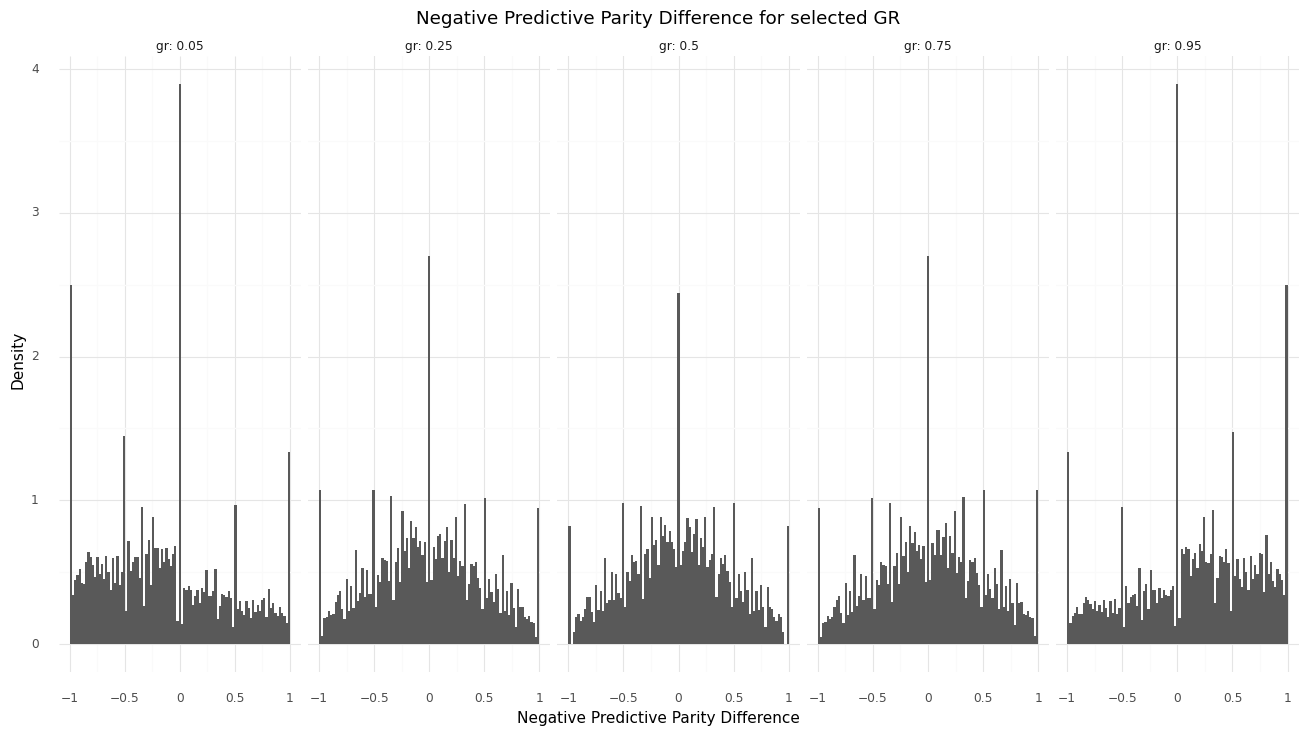

In [11]:
for metric in ["equal_opp_diff", "acc_equality_diff", "stat_parity", "pred_equality_diff", "pos_pred_parity_diff", "neg_pred_parity_diff"]:
    title = fm_full_names.get(metric)
    fig = (
        ggplot(df_selected, aes(x=metric, y=after_stat('density')))
        + geom_histogram(bins=100)
        + facet_grid('.~gr', labeller = 'label_both')
        + theme_minimal()
        + theme(figure_size=(16, 8))
        + xlab(title)
        + ylab("Density")
        + ggtitle(f"{title} for selected GR")
    )
    print(fig)
    fig.save(filename=f"plots/histogram_gr_{metric}.png")


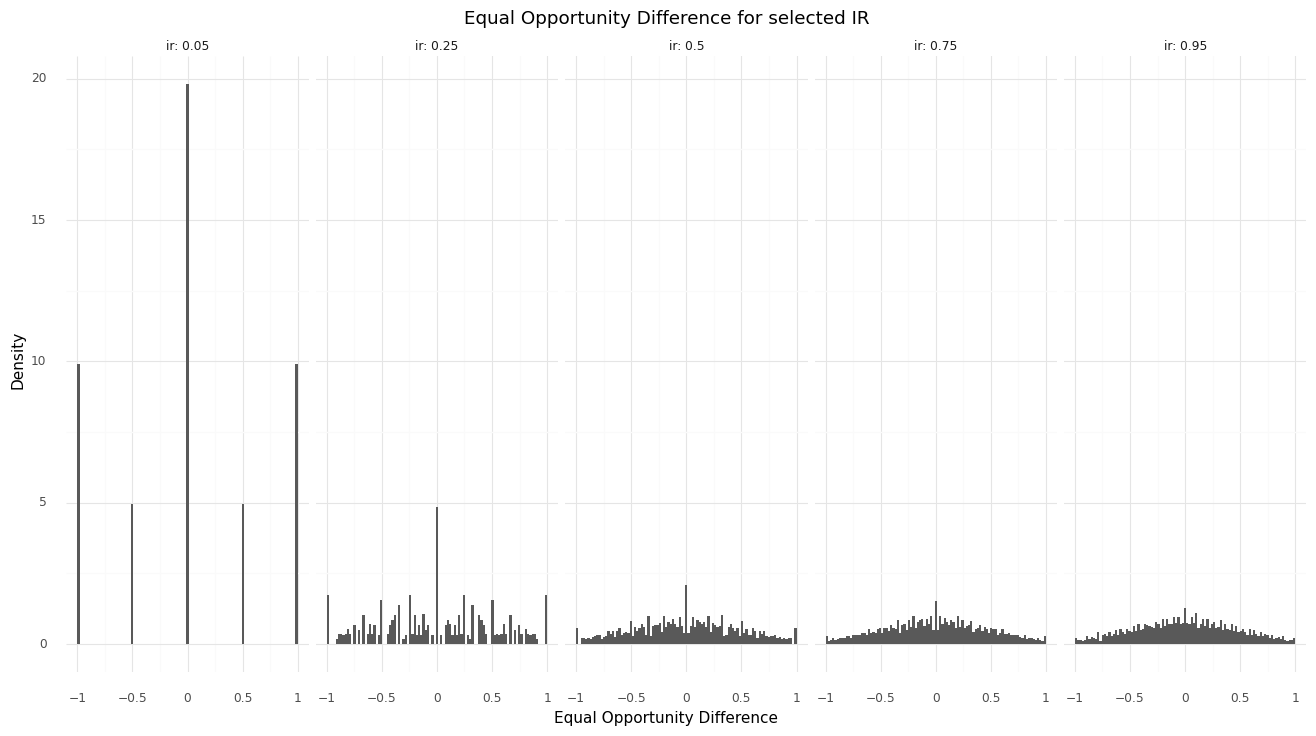

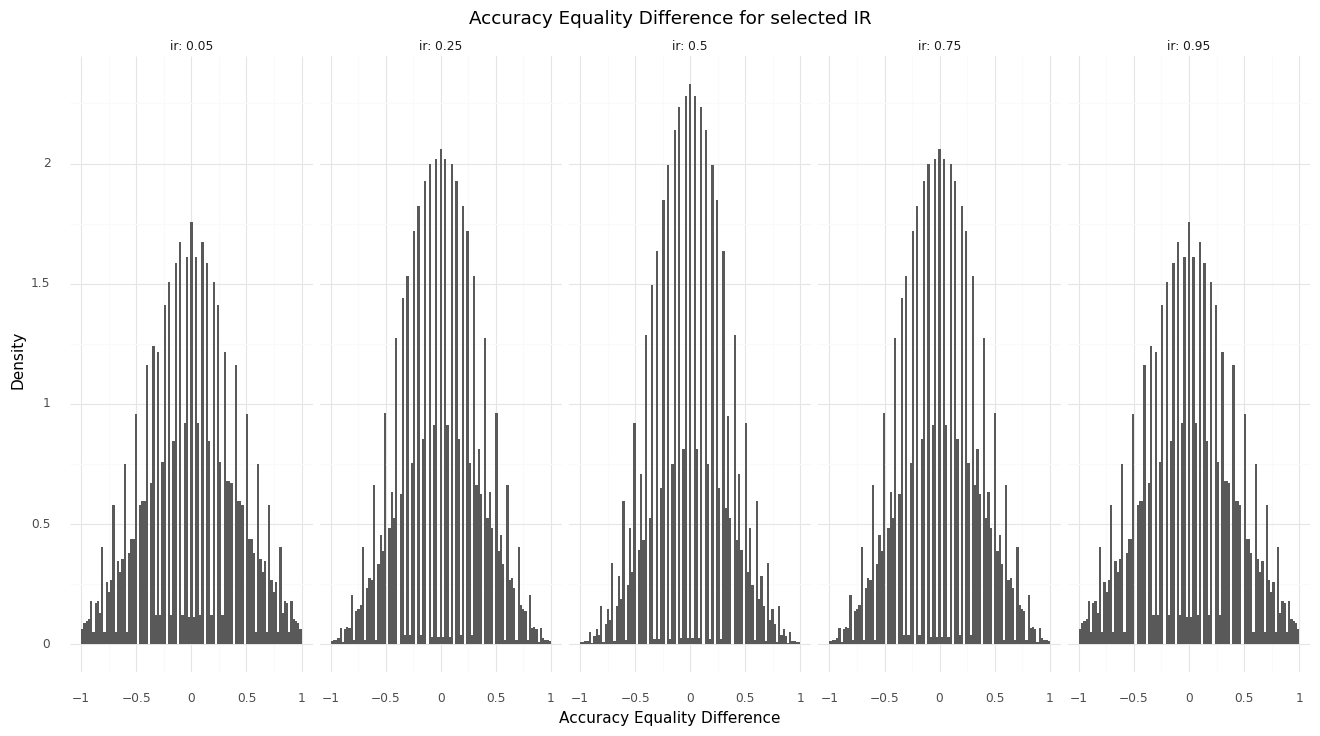

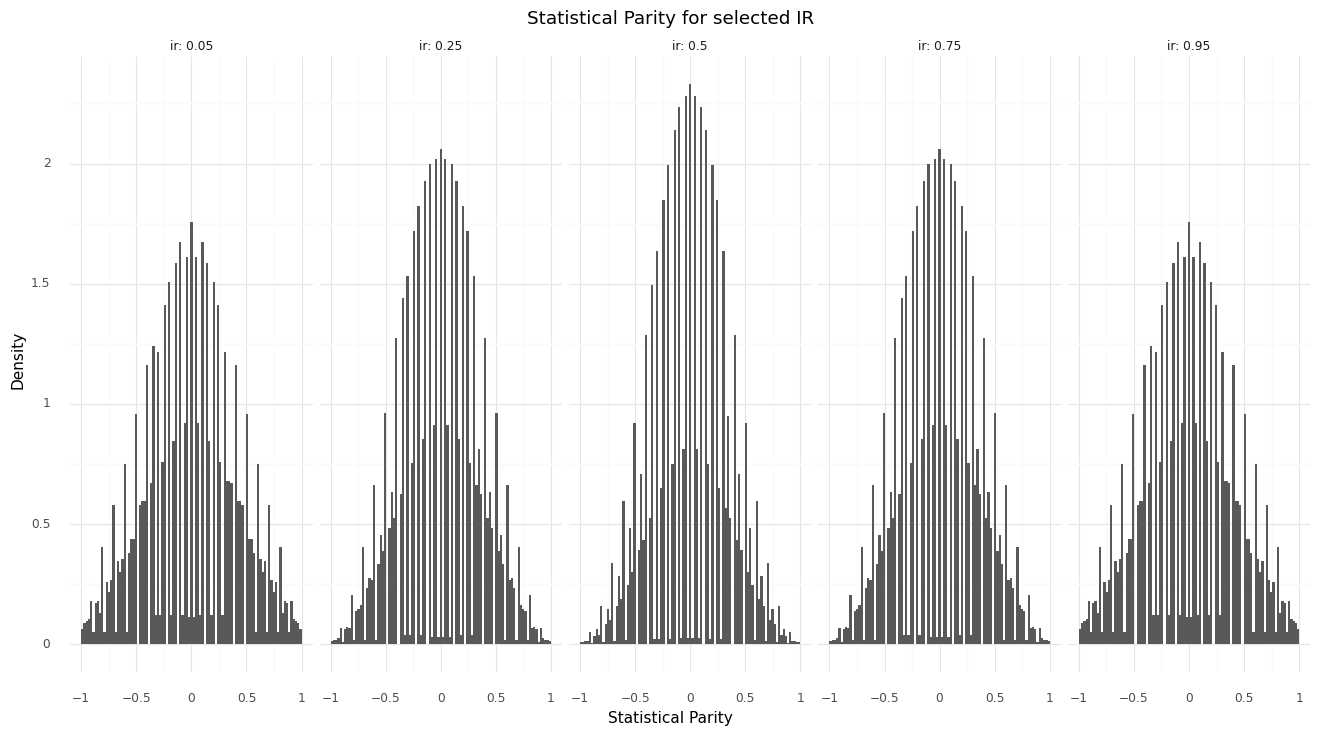

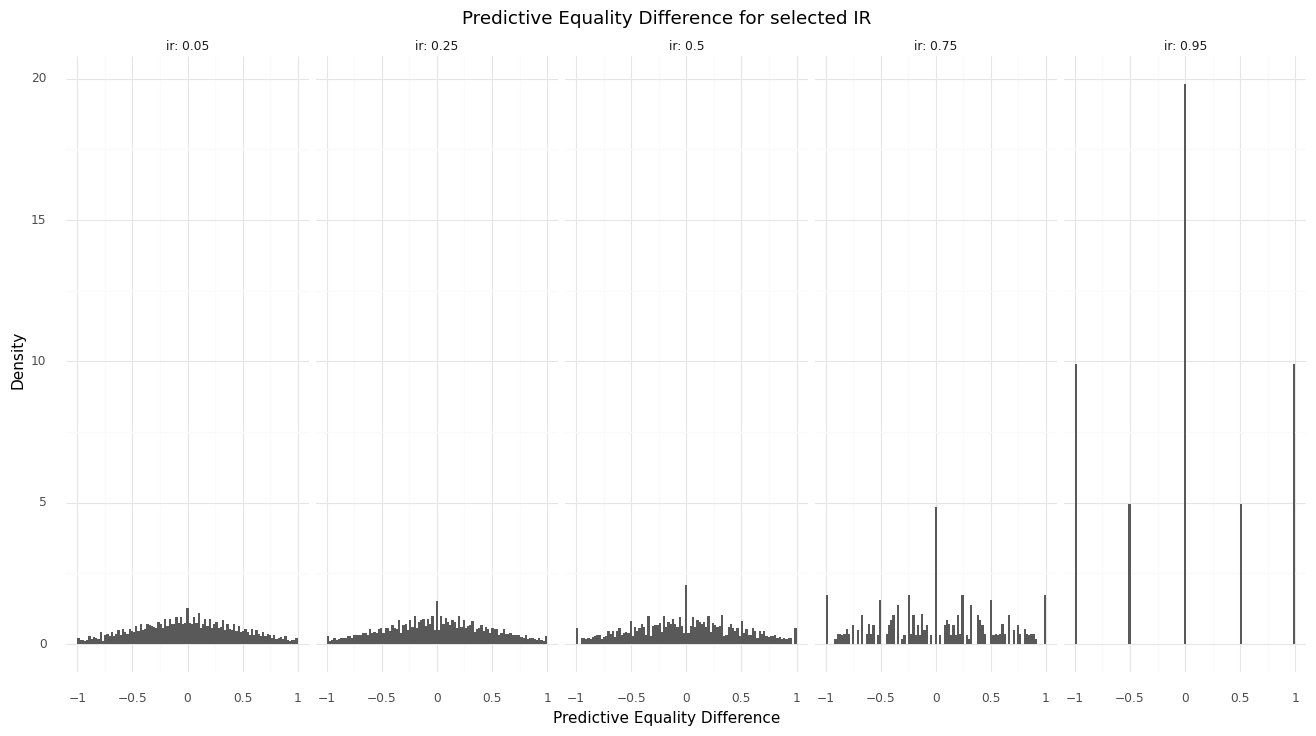

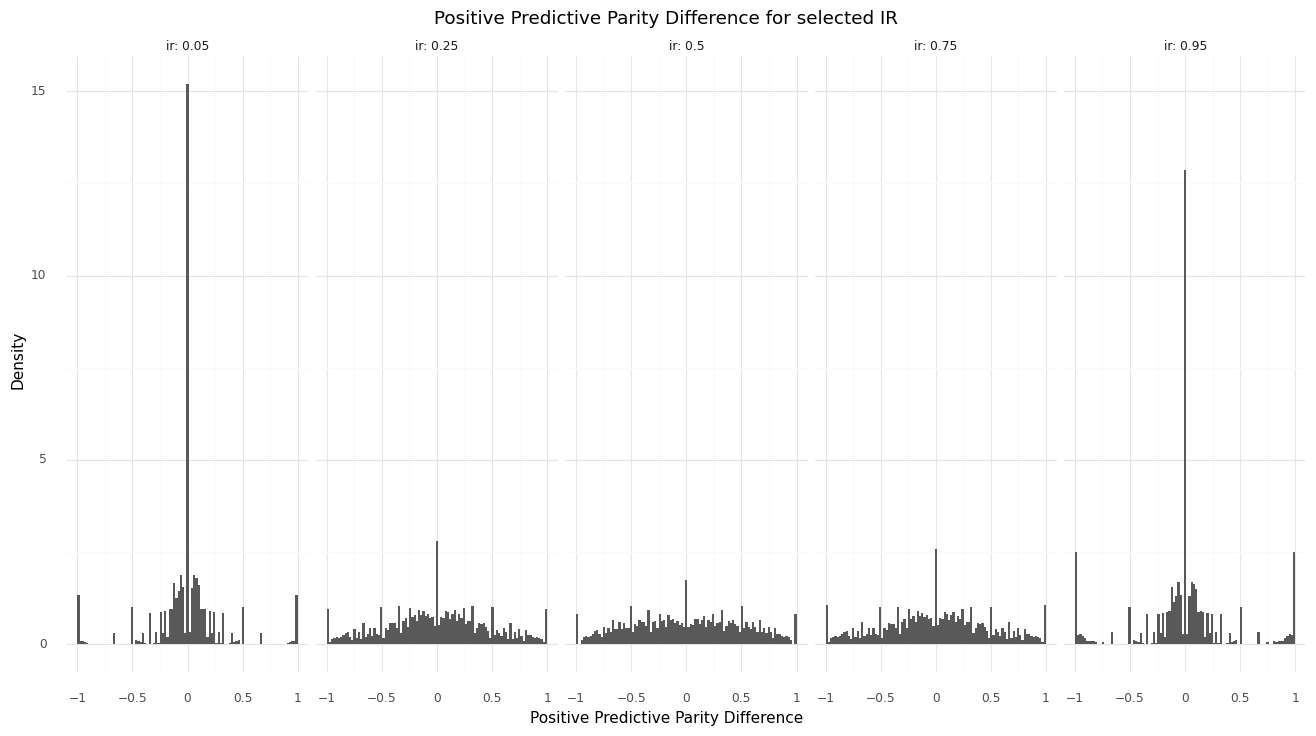

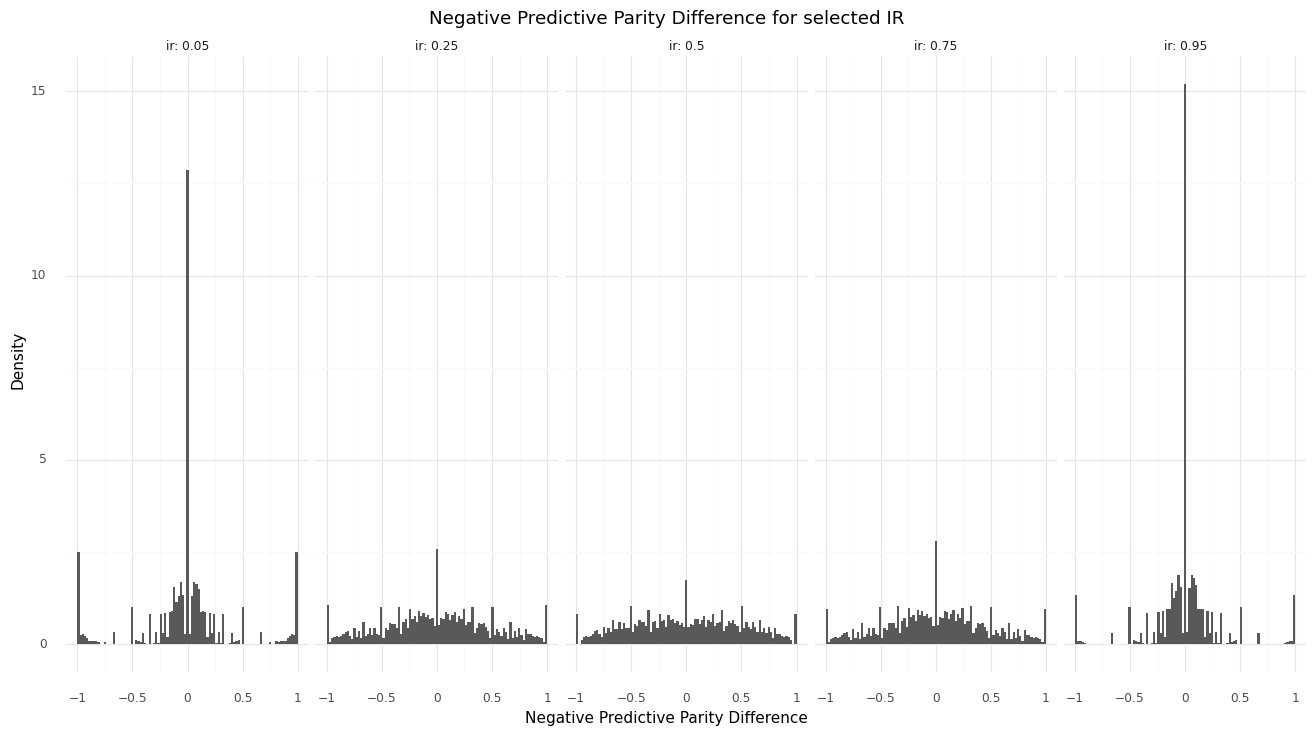

In [12]:
for metric in ["equal_opp_diff", "acc_equality_diff", "stat_parity", "pred_equality_diff", "pos_pred_parity_diff", "neg_pred_parity_diff"]:
    title = fm_full_names.get(metric)
    fig = (
        ggplot(df_selected, aes(x=metric, y=after_stat('density')))
        + geom_histogram(bins=100)
        + facet_grid('.~ir', labeller = 'label_both')
        + theme_minimal()
        + theme(figure_size=(16, 8))
        + xlab(title)
        + ylab("Density")
        + ggtitle(f"{title} for selected IR")
    )
    print(fig)
    fig.save(filename=f"plots/histogram_ir_{metric}.png")
